In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

file_path = '../ml_data/ttv_detection_data.npz' 
data = np.load(file_path)

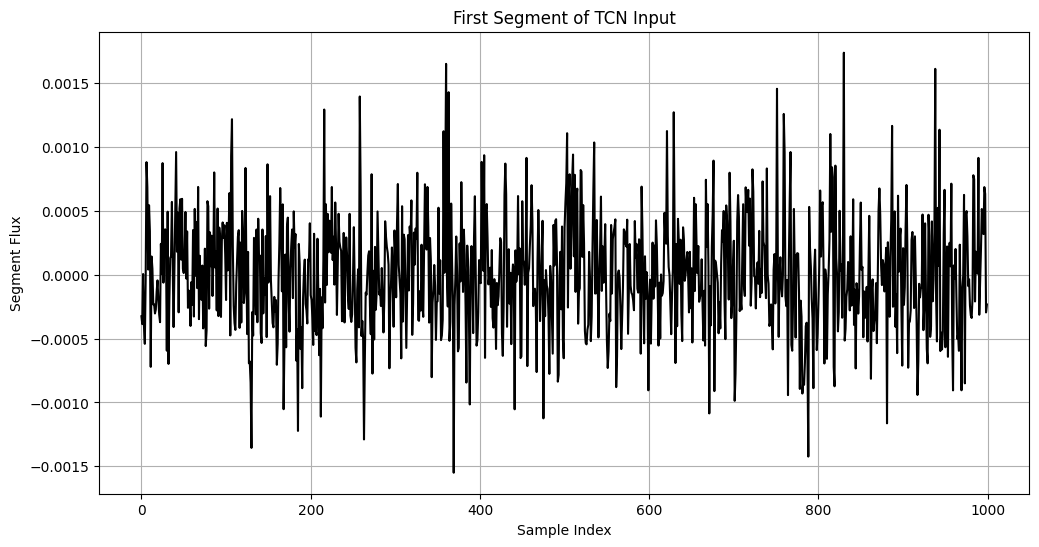

In [3]:
with np.load(file_path) as data:
    X = data['X']
    
    plt.figure(figsize=(12, 6))
    plt.plot(X[0].flatten(), 'k-', markersize=1) 
    plt.xlabel('Sample Index')
    plt.ylabel('Segment Flux')
    plt.title('First Segment of TCN Input')
    plt.grid(True)
    plt.show()

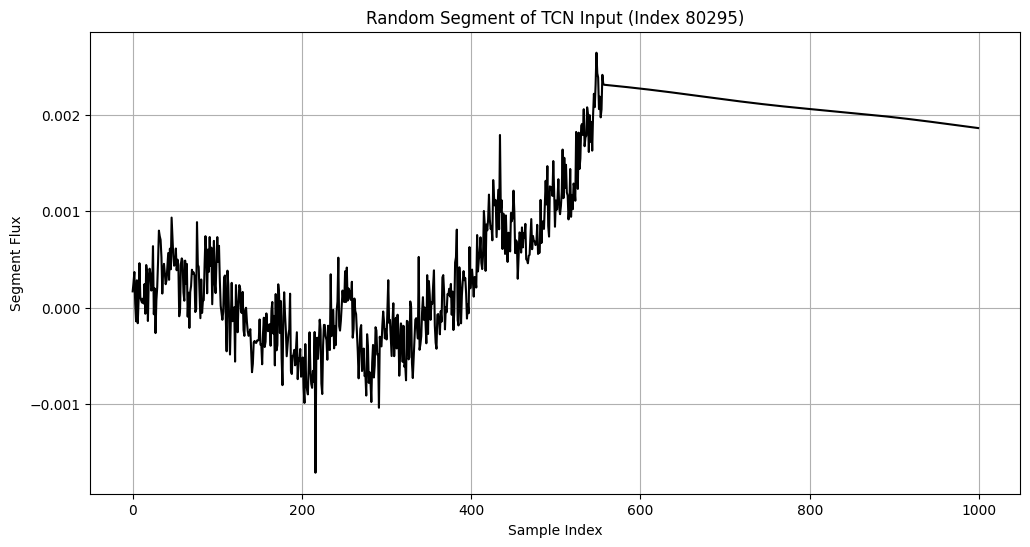

In [6]:
with np.load(file_path) as data:
    X = data['X']
    
    idx = random.randint(0, X.shape[0] - 1)
    plt.figure(figsize=(12, 6))
    plt.plot(X[idx].flatten(), 'k-', markersize=1) 
    plt.xlabel('Sample Index')
    plt.ylabel('Segment Flux')
    plt.title(f'Random Segment of TCN Input (Index {idx})')
    plt.grid(True)
    plt.show()

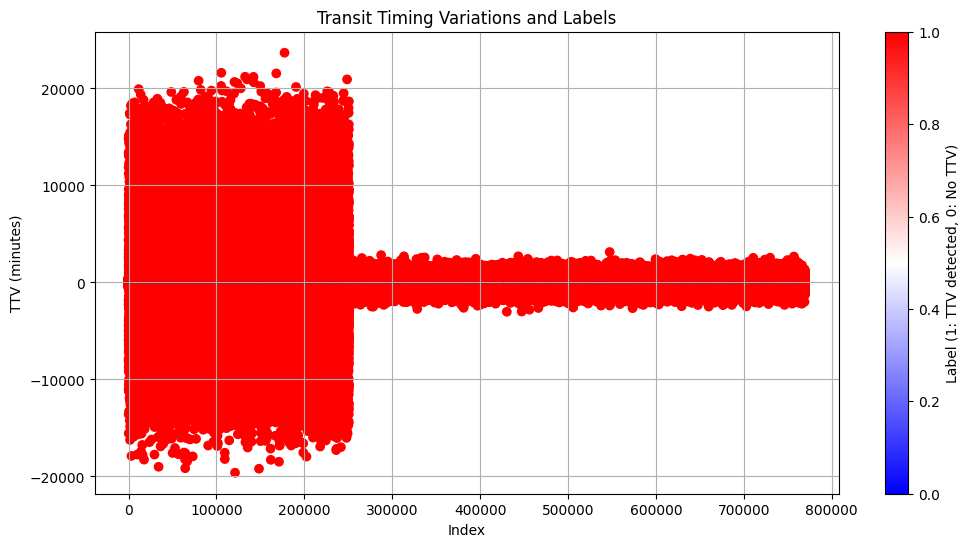

In [7]:
with np.load(file_path) as data:
    y = data['y']
    ttvs = data['ttvs']
    
    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(ttvs)), ttvs, c=y, cmap='bwr', marker='o')
    plt.colorbar(label='Label (1: TTV detected, 0: No TTV)')
    plt.xlabel('Index')
    plt.ylabel('TTV (minutes)')
    plt.title('Transit Timing Variations and Labels')
    plt.grid(True)
    plt.show()

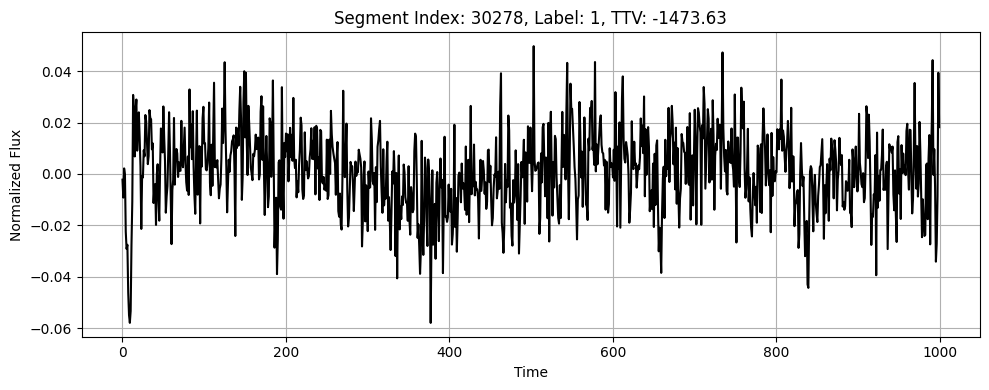

In [8]:
data = np.load(file_path)
X = data['X']
y = data['y']
ttvs = data['ttvs']

X = (X - np.mean(X)) / np.std(X)

idx = random.randint(0, X.shape[0] - 1)

plt.figure(figsize=(10, 4))
plt.plot(X[idx].flatten(), 'k-', markersize=1)
plt.title(f'Segment Index: {idx}, Label: {y[idx]}, TTV: {ttvs[idx]:.2f}')
plt.xlabel('Time')
plt.ylabel('Normalized Flux')
plt.grid(True)
plt.tight_layout()

plt.savefig('input_segment.png')

plt.show()
